In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
df= pd.read_csv("/content/gld_price_data.csv")
df.head()

(2290, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of nan values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#statics
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# correlation
- Positive correlation
- Negative correlation


In [ ]:
cor = df.corr()

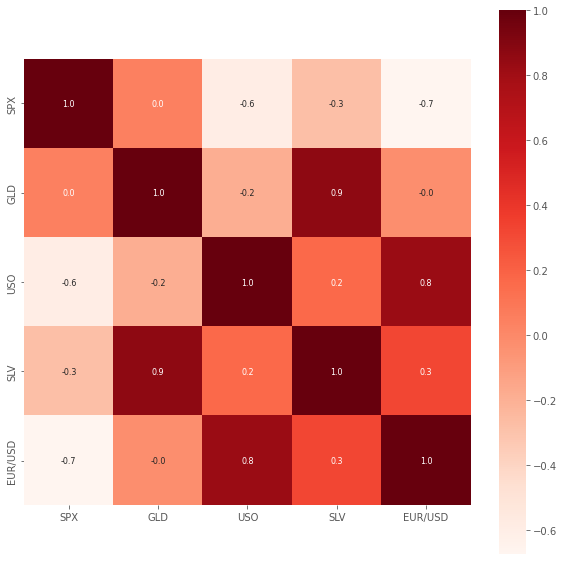

In [ ]:
#Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [ ]:
# correlation for GLD
print(cor['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


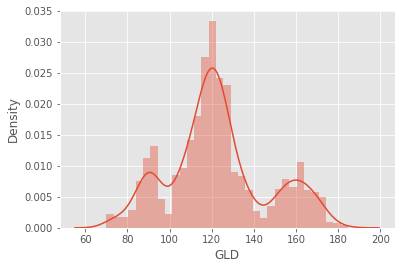

In [ ]:
#the distribution of GLD Price
sns.distplot(df['GLD'])

Splitting the Features and Target

In [ ]:
df_x = df.drop(['Date','GLD'],axis=1)
df_y = df['GLD']
print(df_x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(df_y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Split Train & Test

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=2)

Model Training: Random Forest Regression

In [ ]:
reg = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the Model
reg.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
#prediction on test data
test_data_prediction = reg.predict(x_test)


In [ ]:
print(test_data_prediction)

[168.46329913  82.08450004 116.1703002  127.67150062 120.6720017
 154.72079771 150.05789822 126.18790039 117.5819989  126.15890012
 116.80540085 172.09330094 141.46489769 167.86139784 115.26880014
 117.23160071 137.00550339 170.04920094 159.86370308 156.59809929
 154.97210016 125.09970011 175.10739922 157.30750399 125.23700045
  93.96589954  77.56900004 120.83939996 119.07439924 167.50670001
  88.11040065 125.10820032  90.97760031 117.59390058 121.2337992
 136.04540133 115.52370134 115.42650018 147.74859986 106.99550089
 104.33210247  87.21449786 126.49890032 118.03480001 152.54019928
 119.45800036 108.43779977 107.99049815  93.09250066 127.2698973
  74.96770032 113.64449942 121.35189998 111.37429881 118.93249898
 120.80679913 159.2150999  169.50730074 146.92019649  85.84119836
  94.37130046  86.76089819  90.64560019 118.98350083 126.39940074
 127.4175002  167.45949954 122.32449942 117.34679916  98.46800041
 168.88330232 142.69689839 132.13860277 121.17040223 120.8333993
 119.65550054 

In [ ]:
# R squared error
es = metrics.r2_score(y_test  , test_data_prediction) 
print("R squared = ",es)

R squared =  0.9887779480634545


Compare the y_test and the y_pred

In [ ]:
y_test = list(y_test)

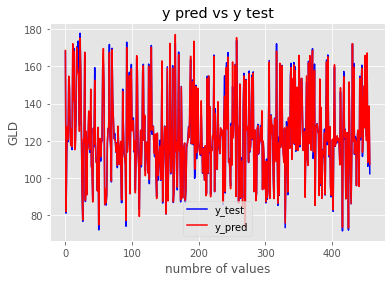

In [ ]:
plt.plot(y_test,color='blue',label='y_test')
plt.plot(test_data_prediction,color='red',label='y_pred')
plt.title ('y pred vs y test')
plt.xlabel('numbre of values')
plt.ylabel('GLD')
plt.legend()
plt.show()
